# Assignment 10, Part 2: Data Wrangling Practice
Use this notebook to follow along with the tasks in the `AO8-Data_Wrangling.ipynb` notebook.

## Instructions
For each task, use the cell below to write and test your code.  You may add additional cells for any task as needed or desired.  

## Task 1a: Setup


Import the following packages:
+ `pandas` as `pd`
+ `numpy` as `np`
+ `matplotlib.pyplot` as `plt`
+ `Seaborn` as `sns`

Activate the `%matplotlib inline` magic.

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Task 5a: Bring it all Together

You have been provided with two data files:
- `paired_genes.txt`: contains log2 transformed gene expression-levels of two genes from *Oryza sativa* (rice). The data contains 463 data points corresponding to samples of extracted RNA.
- `project_samples.txt`: contains the list of 463 samples and the experimental conditions underwhich the data was collected.  

The `project_samples.txt` file contains 6 variables:  
1. Sample ID
2. Treatment: CONTROL, HEAT, DROUGHT 
3. Time: a time series in minutes 
4. Genotype: one of 4 varities of rice
5. Subspecies: either Indica or  Japonica
6. Subtreatment: CONTORL, HEAT, RECOV_HEAT, DROUGHT or RECOV_DROUGHT

This data was obtained from [NCBI SRA Project PRJNA301554](https://www.ncbi.nlm.nih.gov/bioproject/PRJNA301554/)

Import both of these files and generate a scatterplot comparing the gene expression of the two genes. Color the points in the dataframe by the Subtreatment.  Remember to
1. Explore the data
2. Clean the data (if needed)
3. Reshape the data by combining both into a single data frame.
4. Plot the scatterplot using Seaborn and the new single data frame.

In [59]:
data1 = pd.read_csv("paired_genes.txt", sep='\t') 
data1

,Gene,SRR2931040,SRR2931041,SRR2931042,SRR2931043,SRR2931044,SRR2931045,SRR2931046,SRR2931047,SRR2931048,...,SRR2931504,SRR2931505,SRR2931506,SRR2931507,SRR2931509,SRR2931510,SRR2931511,SRR2931512,SRR2931513,SRR2931514
0,LOC_Os04g28420.1,4.268040,4.116958,4.012293,2.288004,3.465565,4.226350,2.000699,3.832970,3.271376,...,2.566332,1.055844,2.405943,0.933891,-0.717344,1.680053,0.460852,2.754201,3.089294,2.502104
1,LOC_Os02g28980.1,5.141542,4.879507,5.029932,4.331433,4.281086,5.036735,4.171653,4.995372,4.789523,...,4.431035,3.699905,3.680951,3.692540,3.468674,3.799060,3.657446,3.437537,4.478832,4.366382


In [98]:
data1.T.head() # approx desired reshape

,0,1
Gene,LOC_Os04g28420.1,LOC_Os02g28980.1
SRR2931040,4.26804,5.14154
SRR2931041,4.11696,4.87951
SRR2931042,4.01229,5.02993
SRR2931043,2.288,4.33143


In [99]:
data2= data1.T

(5, 2)

In [101]:
data1.T.index

Index(['Gene', 'SRR2931040', 'SRR2931041', 'SRR2931042', 'SRR2931043',
       'SRR2931044', 'SRR2931045', 'SRR2931046', 'SRR2931047', 'SRR2931048',
       ...
       'SRR2931504', 'SRR2931505', 'SRR2931506', 'SRR2931507', 'SRR2931509',
       'SRR2931510', 'SRR2931511', 'SRR2931512', 'SRR2931513', 'SRR2931514'],
      dtype='object', length=463)

In [136]:
melted_data1 = pd.melt(data1, id_vars=['Gene'], var_name='Sample', value_name='Expression Level' )
melted_data1.reset_index(drop=True, inplace=True)
melted_data1.tail(5)

,Gene,Sample,Expression Level
919,LOC_Os02g28980.1,SRR2931512,3.437537
920,LOC_Os04g28420.1,SRR2931513,3.089294
921,LOC_Os02g28980.1,SRR2931513,4.478832
922,LOC_Os04g28420.1,SRR2931514,2.502104
923,LOC_Os02g28980.1,SRR2931514,4.366382


In [147]:
pivoted_melted_data1 = pd.pivot_table(index=['Sample'], columns='Gene', values="Expression Level", data=melted_data1)
pivoted_melted_data1.reset_index(drop=False, inplace=True)
pivoted_melted_data1.head(5)

Gene,Sample,LOC_Os02g28980.1,LOC_Os04g28420.1
0,SRR2931040,5.141542,4.268040
1,SRR2931041,4.879507,4.116958
2,SRR2931042,5.029932,4.012293
3,SRR2931043,4.331433,2.288004
4,SRR2931044,4.281086,3.465565


In [148]:
pivoted_melted_data1.shape

(462, 3)

In [149]:
pivoted_melted_data1.columns

Index(['Sample', 'LOC_Os02g28980.1', 'LOC_Os04g28420.1'], dtype='object', name='Gene')

In [60]:
data1.dtypes.head()

Gene           object
SRR2931040    float64
SRR2931041    float64
SRR2931042    float64
SRR2931043    float64
dtype: object

In [61]:
# vs data1
data1.shape

(2, 463)

In [62]:
# JUst the longer route..
data1_melt = pd.melt(data1, id_vars=['Gene']) 
data1_melt.head()

,Gene,variable,value
0,LOC_Os04g28420.1,SRR2931040,4.268040
1,LOC_Os02g28980.1,SRR2931040,5.141542
2,LOC_Os04g28420.1,SRR2931041,4.116958
3,LOC_Os02g28980.1,SRR2931041,4.879507
4,LOC_Os04g28420.1,SRR2931042,4.012293


In [91]:
data1_melt.columns = ['Gene', 'Sample', 'Expression Level']
data1_melt.head()

,Gene,Sample,Expression Level
0,LOC_Os04g28420.1,SRR2931040,4.268040
1,LOC_Os02g28980.1,SRR2931040,5.141542
2,LOC_Os04g28420.1,SRR2931041,4.116958
3,LOC_Os02g28980.1,SRR2931041,4.879507
4,LOC_Os04g28420.1,SRR2931042,4.012293


In [64]:
data1_melt.index

RangeIndex(start=0, stop=924, step=1)

In [78]:
data2 = pd.read_csv("project_samples.txt", sep='\t') 
data2.head(2)

,Sample,Treatment,Time,Genotype,Subspecies,Subtreatment
0,SRR2931040,CONTROL,15,AZ,Japonica,CONTROL
1,SRR2931041,CONTROL,15,AZ,Japonica,CONTROL


In [152]:
data.tail(5)

,Sample,Treatment,Time,Genotype,Subspecies,Subtreatment
457,SRR2931510,DROUGHT,240,TD,Indica,RECOV_DROUGHT
458,SRR2931511,DROUGHT,270,TD,Indica,RECOV_DROUGHT
459,SRR2931512,DROUGHT,270,TD,Indica,RECOV_DROUGHT
460,SRR2931513,DROUGHT,300,TD,Indica,RECOV_DROUGHT
461,SRR2931514,DROUGHT,300,TD,Indica,RECOV_DROUGHT


In [ ]:
# data.reset_index(drop=False, Inplace=True)


In [7]:
data.dtypes

Sample          object
Treatment       object
Time             int64
Genotype        object
Subspecies      object
Subtreatment    object
dtype: object

In [8]:
data.shape

(462, 6)

In [10]:
data.describe() ## makes no sense!!

,Time
count,462.000000
mean,142.727273
std,75.066328
min,15.000000
25%,90.000000
50%,142.500000
75%,195.000000
max,300.000000


In [11]:
data.groupby(by=['Subspecies']).size() # groups by Subspecies, then returns counts for each catergory using size function

Subspecies
Indica      229
Japonica    233
dtype: int64

In [12]:
data.groupby(by=['Treatment']).size() # groups by sex, then returns counts for each catergory using size function

Treatment
CONTROL    141
DROUGHT    134
HEAT       187
dtype: int64

In [150]:
merged_data = pd.merge(data, pivoted_melted_data1)
merged_data.head()

,Sample,Treatment,Time,Genotype,Subspecies,Subtreatment,LOC_Os02g28980.1,LOC_Os04g28420.1
0,SRR2931040,CONTROL,15,AZ,Japonica,CONTROL,5.141542,4.268040
1,SRR2931041,CONTROL,15,AZ,Japonica,CONTROL,4.879507,4.116958
2,SRR2931042,CONTROL,30,AZ,Japonica,CONTROL,5.029932,4.012293
3,SRR2931043,CONTROL,30,AZ,Japonica,CONTROL,4.331433,2.288004
4,SRR2931044,CONTROL,45,AZ,Japonica,CONTROL,4.281086,3.465565


In [151]:
merged_data.shape

(462, 8)

In [153]:
merged_data.dtypes

Sample               object
Treatment            object
Time                  int64
Genotype             object
Subspecies           object
Subtreatment         object
LOC_Os02g28980.1    float64
LOC_Os04g28420.1    float64
dtype: object

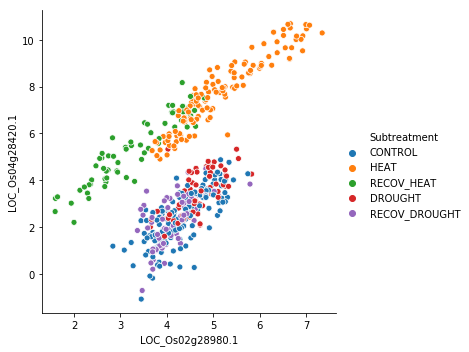

In [154]:
sns.relplot(x="LOC_Os02g28980.1", y="LOC_Os04g28420.1", hue="Subtreatment", data=merged_data)

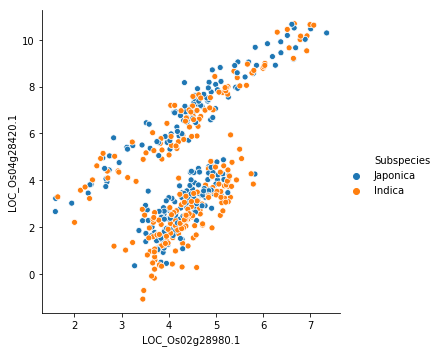

In [155]:
sns.relplot(x="LOC_Os02g28980.1", y="LOC_Os04g28420.1", hue="Subspecies", data=merged_data)

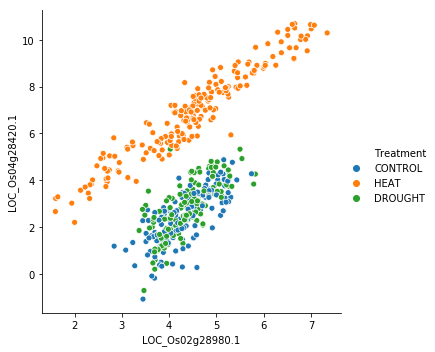

In [156]:
sns.relplot(x="LOC_Os02g28980.1", y="LOC_Os04g28420.1", hue="Treatment", data=merged_data)